In [1]:
import numpy as np
from matplotlib import pyplot as plt

from IPython.display import display, Math, display_latex


from math import gamma

%matplotlib inline

In [2]:
def Pr_espaco_livre(Pt, Gt, Gr, lmb, d, L = 1):
    return ( Pt*Gt*Gr*lmb**2 ) / ( (4*np.pi)**2 * d**2 * L )

In [3]:
def Pr_lod_dist(Pr_d0, d0, d, n):
    return Pr_d0*((d0/d)**n)

In [4]:
def W_to_dBW(x):
    return 10*np.log10(x)

In [5]:
def W_to_dBm(x):
    return 10*np.log10(x / (10 ** (-3)))

In [6]:
def dBW_to_dBm(x):
    return x + 30

In [7]:
def dBm_to_W(x):
    return 10 ** ((x/10) - 3)

In [8]:
def dBm_to_dBW(x):
    return x - 30

In [9]:
def Pr_to_PL(Pt, Pr):
    return 10*np.log10(Pt/Pr)

In [10]:
d0 = 1
Pt_W = 2e-3
fc= 1.8e9
lmb = 3e8/fc
d = np.array([10, 20, 50, 100, 300])
Pr_medido_dBm = np.array([-65, -72, -87, -105, -128])
Pr_medido_dBW = dBm_to_dBW(Pr_medido_dBm)
Pr_medido_dBW

array([ -95, -102, -117, -135, -158])

In [11]:
Pr_d0 = Pr_espaco_livre(Pt_W, 1, 1, lmb, d0)
Pr_d0

3.5180966542478393e-07

In [12]:
Pr_d0_dBW = W_to_dBW(Pr_d0)
Pr_d0_dBW

-64.53692233147498

In [13]:
def n_coef(d):
    return -10*np.log10(1/d)

In [14]:
A_coef = Pr_medido_dBW - Pr_d0_dBW
B_coef = n_coef(d)
A_coef, B_coef

(array([-30.46307767, -37.46307767, -52.46307767, -70.46307767,
        -93.46307767]),
 array([10.        , 13.01029996, 16.98970004, 20.        , 24.77121255]))

In [15]:
a = np.sum(B_coef**2)
b = np.sum(2*A_coef*B_coef)
c = np.sum(A_coef**2)
a, b, c

(1571.5307835834865, -10815.647846008167, 18784.248009683542)

In [16]:
n = -b/(2*a)
n

3.4411186719950093

In [17]:
np.sqrt((a*n**2 + b*n + c)/5)

5.920880565809282

In [18]:
Pt_dBW = W_to_dBW(Pt_W)
Pt_dBW

-26.989700043360187

In [19]:
#%%latex
#$$ P_r(d) = Pt_dBW $$

In [20]:
#display(Math('Pr_r(d)\space= \space{} \space -{}\space log(d) \space [dBW]'.format(Pr_d0_dBW, n*10)))

In [21]:
Pr_d0_dBW

-64.53692233147498

In [22]:
def modelo(d):
    return Pr_d0_dBW - n*10*np.log10(d)

In [23]:
model_results_dBW = modelo(d)
model_results_dBW

array([ -98.94810905, -109.30690844, -123.00049638, -133.35929577,
       -149.77760436])

In [24]:
dBW_to_dBm(model_results_dBW)

array([ -68.94810905,  -79.30690844,  -93.00049638, -103.35929577,
       -119.77760436])

In [25]:
shadowing_deviation = np.std((Pr_medido_dBW-model_results_dBW))
shadowing_deviation

5.733316255360231

In [26]:
np.sqrt(np.sum((Pr_medido_dBW-model_results_dBW)**2)/5)

5.920880565809275

In [27]:
#def modelo_atualizado(d):
#    return modelo(d) + shadowing_deviation

In [28]:
display(Math('P_r(d = 200m):'))
Pr_200m = modelo(200)
dBW_to_dBm(Pr_200m)

<IPython.core.display.Math object>

-113.7180951604742

In [29]:
d = np.arange(10, 1011, 50)
d

array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010])

In [30]:
modelo_1km = modelo(d)
dBW_to_dBm(modelo_1km)

array([ -68.94810905,  -95.72521702, -104.78366719, -110.38330661,
       -114.44724409, -117.63902113, -120.26763476, -122.502325  ,
       -124.44591548, -126.16557927, -127.70762522, -129.10533367,
       -130.38342736, -131.56077516, -132.65210576, -133.66913676,
       -134.62134339, -135.51649647, -136.36104819, -137.16041458,
       -137.91918609])

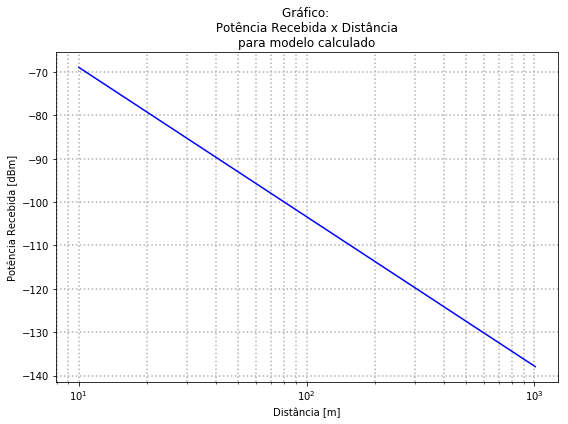

In [31]:
fig, ax = plt.subplots(figsize=(8,6))

plt.title("Gráfico: \n Potência Recebida x Distância \npara modelo calculado")
plt.xlabel("Distância [m]")
plt.ylabel("Potência Recebida [dBm]")

ax.semilogx(d, dBW_to_dBm(modelo_1km), 'b-')

fig.tight_layout()
plt.grid(which = 'both', linestyle=':', linewidth=1.5)

#plt.show()

plt.savefig('graph.png', bbox_inches='tight')

In [32]:
def function(n):
    return a*n**2 + b*n + c

In [33]:
n = np.linspace(1.5, 6, 100)
n

array([1.5       , 1.54545455, 1.59090909, 1.63636364, 1.68181818,
       1.72727273, 1.77272727, 1.81818182, 1.86363636, 1.90909091,
       1.95454545, 2.        , 2.04545455, 2.09090909, 2.13636364,
       2.18181818, 2.22727273, 2.27272727, 2.31818182, 2.36363636,
       2.40909091, 2.45454545, 2.5       , 2.54545455, 2.59090909,
       2.63636364, 2.68181818, 2.72727273, 2.77272727, 2.81818182,
       2.86363636, 2.90909091, 2.95454545, 3.        , 3.04545455,
       3.09090909, 3.13636364, 3.18181818, 3.22727273, 3.27272727,
       3.31818182, 3.36363636, 3.40909091, 3.45454545, 3.5       ,
       3.54545455, 3.59090909, 3.63636364, 3.68181818, 3.72727273,
       3.77272727, 3.81818182, 3.86363636, 3.90909091, 3.95454545,
       4.        , 4.04545455, 4.09090909, 4.13636364, 4.18181818,
       4.22727273, 4.27272727, 4.31818182, 4.36363636, 4.40909091,
       4.45454545, 4.5       , 4.54545455, 4.59090909, 4.63636364,
       4.68181818, 4.72727273, 4.77272727, 4.81818182, 4.86363

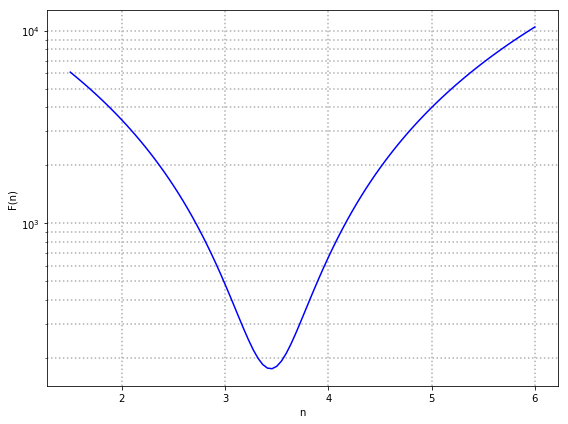

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel("n")
plt.ylabel("F(n)")

ax.semilogy(n, function(n), 'b-')

fig.tight_layout()

plt.grid(which = 'both', linestyle=':', linewidth=1.5)

#plt.show()

plt.savefig('Fn_n.png', bbox_inches='tight')